# Nama: Laksmi Dyah Nurlita
# NIM: 21110023

# **Import Data**

1. Data diperoleh dari Kaggle, yaitu data klasifikasi penderita diabetes atau tidak (https://www.kaggle.com/datasets/himanshunakrani/naive-bayes-classification-data).
2. Dataset tersebut memiliki 3 kolom, yaitu kolom glucose, bloodpressure dan diabetes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Import dataset
dataset = pd.read_csv('diabetes.csv')

#Print dataset 5 teratas
dataset.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [ ]:
#Dimensi data
dataset.shape

(995, 3)

Output: terdiri dari 995 baris dan 3 kolom

In [ ]:
#Melihat informasi
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


Output: terdiri dari 955 baris dari index 0-9,94 memiliki total 3 kolom yg memiliki masing-masing data non-null. setiap kolom memiliki type data integer 64 bit

# **Split Data**

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

output: Dalam memprediksi apakah seseorang menderita diabetes atau tidak, maka pada variabel y untuk kolom 'diabetes' dan variabel x untuk kolom 'glucose' dan 'bloodpressure'

In [ ]:
#Memisahkan data menjadi train dan test
from sklearn.model_selection import train_test_split

#Masukkan ukuran test sebesar 25%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

**Scaling**
> Data yang dimasukkan bisa terdistribusi

In [ ]:
from sklearn.preprocessing import StandardScaler

#Scaling input data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

# **Bernoulli**
> Salah satu jenis algoritma klasifikasi yang merupakan variasi dari algoritma Naive Bayes. Cocok digunakan pada data ketegorikal biner (0 dan 1) yang memprediksi kelas output diskrit.

In [ ]:
from sklearn.naive_bayes import BernoulliNB

#Buat objek classifier
classifier_bern = BernoulliNB()

#Training model
classifier_bern.fit(x_train, y_train)

#Testing model
y_pred_bern = classifier_bern.predict(x_test)

Output: sudah melatih model dgn data x_train dan y_train. Kemudian, memprediksi data x_test menggunakan model tersebut. Hasil disimpan dalam variabel y_pred_bern

**Akurasi Bernoulli**

In [ ]:
from sklearn.metrics import accuracy_score

#Print akurasi model
print("Accuracy: ", accuracy_score(y_pred_bern, y_test))
print("F1 Score: ", f1_score(y_pred_bern, y_test))

Accuracy:  0.8714859437751004
F1 Score:  0.8787878787878788


Output: Akurasi model dgn membandingkan hasil prediksi dengan hasil sesungguhnya dan mendapatkan nilai 0,87 atau 87% yang berarti model dapat memprediksi 87% data secara akurat.

Evaluasi Bernoulli

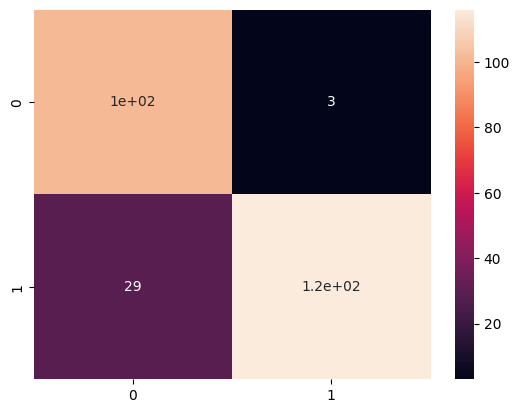

In [ ]:
from sklearn.metrics import confusion_matrix

#Membandingkan data test dan data prediksi
cm = confusion_matrix(y_test, y_pred_bern)

#Nilai data di setiap bagian matriks
sns.heatmap(cm, annot = True)
plt.savefig('Confusion_bern.png')

Output: Pada baris pertama kolom pertama terdapat 1e+02 label '0' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 3 label'0' yang diprediksi sebagai label '1', sehingga diprediksi dengan salah. Pada baris pertama kolom kedua terdapat 29 label '1' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 1.2e+02 label'1' yang diprediksi dengan benar.

In [ ]:
from sklearn.metrics import classification_report

#Tampilkan classification report bernoulli
print(classification_report(y_test, y_pred_bern))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       104
           1       0.97      0.80      0.88       145

    accuracy                           0.87       249
   macro avg       0.88      0.89      0.87       249
weighted avg       0.89      0.87      0.87       249



**Gaussian Naive Bayes**
> Digunakan dalam data berdistribusi normal.

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Buat objek classifier
classifier_gaus = GaussianNB()

#Training model
classifier_gaus.fit(x_train, y_train)

#Testing model
y_pred_gaus = classifier_gaus.predict(x_test)

Output: sudah melatih model dgn data x_train dan y_train. Kemudian, memprediksi data x_test menggunakan model tersebut. Hasil disimpan dalam variabel y_pred_gaus

Akurasi Gaussian

In [ ]:
#Print akurasi model
print("Accuracy: ", accuracy_score(y_test, y_pred_gaus))
print("F1 Score: ", f1_score(y_test, y_pred_gaus))

Accuracy:  0.8875502008032129
F1 Score:  0.8947368421052632


Output: Akurasi model dgn membandingkan hasil prediksi dengan hasil sesungguhnya dan mendapatkan nilai 0,89 atau 89% yang berarti model dapat memprediksi 89% data secara akurat.

Evaluasi Gaussian

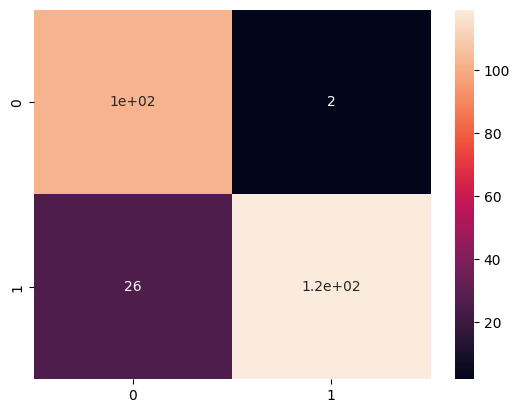

In [ ]:
#Membandingkan data test dan data prediksi
cm = confusion_matrix(y_test, y_pred_gaus)

#Nilai data di setiap bagian matriks
sns.heatmap(cm, annot = True)
plt.savefig('Confusion_gaus.png')

Output: Pada baris pertama kolom pertama terdapat 64 label '0' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 4 label'0' yang diprediksi sebagai label '1', sehingga diprediksi dengan salah. Pada baris pertama kolom kedua terdapat 5 label '1' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 27 label'1' yang diprediksi dengan benar.

In [ ]:
#Tampilkan classification report bernoulli
print(classification_report(y_test, y_pred_gaus))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       104
           1       0.98      0.82      0.89       145

    accuracy                           0.89       249
   macro avg       0.89      0.90      0.89       249
weighted avg       0.91      0.89      0.89       249

